### 1. Environment Setup

In [1]:
import openai
openai.api_key = open("openai_key.txt", "r").read()

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

### 2. OpenAI Quickstart Guide

In [ ]:
completion = openai.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {
            "role": "user",
            "content": "Write a haiku about recursion in programming."
        }
    ]
)

print(completion.choices[0].message.content)

### 3. Load & Explore Raw Coca-Cola Dataset

In [17]:
# Read the xlsx file
cocacola_df = pd.read_excel('Coca-Cola Original_with label.xlsx')

cocacola_df.head()

,Review,Time,Rate,Output,Sentiment Result,Label Result,Converted_Date
0,Items received in accordance to time stated an...,2022-01-11 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""Items rece...",1.0,logistic,2022-01-11
1,delivery as scheduled. All items clean and new...,2022-01-10 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""delivery a...",1.0,product,2022-01-10
2,It is well packed & all orders are in good con...,4 days ago,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The text e...",1.0,logistic,2024-02-03
3,Thel delivery was very fast. The pricing consi...,1 week ago,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The delive...",1.0,price,2024-01-31
4,It is well packed & all orders are in good con...,2023-12-27 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The text e...",1.0,logistic,2023-12-27


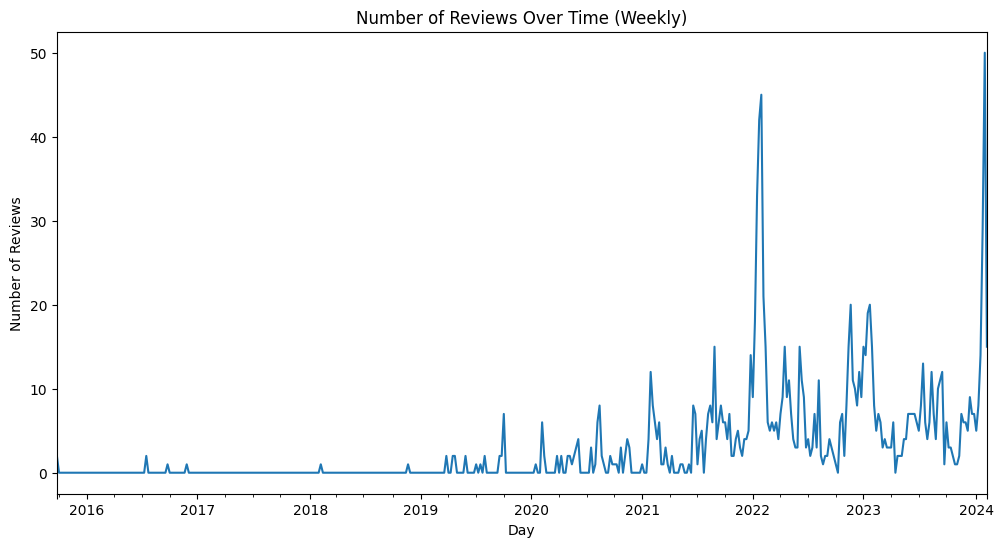

In [18]:
# Group reviews by week
weekly_comments = cocacola_df.resample('W', on='Converted_Date').size()

# Plot the data
weekly_comments.plot(kind='line', figsize=(12, 6))
plt.xlabel('Day')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time (Weekly)')
plt.show()

### 4. Use ChatGPT API to determine review categories & sentiments

In [19]:
# Limit dataset to 2021 and above
cocacola_df = cocacola_df[cocacola_df["Converted_Date"] >= "2021-01-01"]
cocacola_df.describe()

,Rate,Sentiment Result,Converted_Date
count,1143.000000,1134.000000,1143
mean,0.791776,0.664903,2022-09-22 20:15:44.881889792
min,-1.000000,-1.000000,2021-01-02 00:00:00
25%,1.000000,1.000000,2022-01-21 00:00:00
50%,1.000000,1.000000,2022-10-10 00:00:00
75%,1.000000,1.000000,2023-06-24 12:00:00
max,1.000000,1.000000,2024-02-06 00:00:00
std,0.598043,0.730536,NaN


In [20]:
# Define the categories and sentiments
sentiments = ["positive", "neutral", "negative"]

# Function to get categories for a reviews
def get_review_categories(review):
    response = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {
                "role": "user",
                "content": f"First, identify categories for the following review: '{review}'. Categories include:.\
                    1. Taste: related to flavor experience, eg. sweetness, carbonation, etc.\
                    2. Price: related to cost, eg. value for money, discounts, etc.\
                    3. Expiry: related to product expiration, eg. expiry date, shell life etc.\
                    4. Packaging: related to appearance of product, not affected by delivery condition, eg. ease of storage, size, design, etc.\
                    5. Delivery: related to shipping and condition upon delivery, eg. speed, tracking, message before delivery, dents etc.\
                    6. Customer Service: related to product inquiry and return/refund process, eg. response speed, refund speed, etc.\
                    Multiple categories can be chosen, but limited to options stated, and only include if confident.\
                    Then, for each category selected, sentiment is also selected, including: {', '.join(sentiments)}.\
                    Respond in a dictionary starting and ending with curly brackets only, format: \"category1\": \"sentiment1\", \"category2\": \"sentiment2\""
            }
        ]
    )
    return response.choices[0].message.content

# Apply the function to the "Review" column
cocacola_df['Categories'] = cocacola_df['Review'].apply(get_review_categories)

# Display the dataframe with the new "Categories" column
cocacola_df.to_excel('CocaCola_Reviews_with_Categories_v2.xlsx', index=False)
cocacola_df.head()

,Review,Time,Rate,Output,Sentiment Result,Label Result,Converted_Date,Categories
0,Items received in accordance to time stated an...,2022-01-11 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""Items rece...",1.0,logistic,2022-01-11,"{""Delivery"": ""positive""}"
1,delivery as scheduled. All items clean and new...,2022-01-10 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""delivery a...",1.0,product,2022-01-10,"{""Delivery"": ""positive"", ""Packaging"": ""positive""}"
2,It is well packed & all orders are in good con...,4 days ago,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The text e...",1.0,logistic,2024-02-03,"{\n ""Packaging"": ""positive"",\n ""Price"": ""pos..."
3,Thel delivery was very fast. The pricing consi...,1 week ago,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The delive...",1.0,price,2024-01-31,"{""Delivery"": ""positive"", ""Price"": ""positive"", ..."
4,It is well packed & all orders are in good con...,2023-12-27 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The text e...",1.0,logistic,2023-12-27,"{\n ""Price"": ""positive"",\n ""Delivery"": ""posi..."


### 5. Sentiment Analysis

#### 5a. Import new dataset with categories

In [21]:
cocacola_df = pd.read_excel('CocaCola_Reviews_with_Categories_v2.xlsx')

cocacola_df.head()

,Review,Time,Rate,Output,Sentiment Result,Label Result,Converted_Date,Categories
0,Items received in accordance to time stated an...,2022-01-11 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""Items rece...",1.0,logistic,2022-01-11,"{""Delivery"": ""positive""}"
1,delivery as scheduled. All items clean and new...,2022-01-10 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""delivery a...",1.0,product,2022-01-10,"{""Delivery"": ""positive"", ""Packaging"": ""positive""}"
2,It is well packed & all orders are in good con...,4 days ago,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The text e...",1.0,logistic,2024-02-03,"{\n ""Packaging"": ""positive"",\n ""Price"": ""pos..."
3,Thel delivery was very fast. The pricing consi...,1 week ago,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The delive...",1.0,price,2024-01-31,"{""Delivery"": ""positive"", ""Price"": ""positive"", ..."
4,It is well packed & all orders are in good con...,2023-12-27 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The text e...",1.0,logistic,2023-12-27,"{\n ""Price"": ""positive"",\n ""Delivery"": ""posi..."


#### 5b. Calculate average sentiment 

In [22]:
# Define the sentiment values
sentiment_mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}

# Function to calculate the average sentiment
def calculate_average_sentiment(category_dict_str):
    category_dict = ast.literal_eval(category_dict_str)
    sentiments = [sentiment_mapping.get(sentiment, 0) for sentiment in category_dict.values()]
    if sentiments:
        return sum(sentiments) / len(sentiments)
    return 0

# Apply the function to create a new column 'Average_Sentiment'
cocacola_df['Average_Sentiment'] = cocacola_df['Categories'].apply(calculate_average_sentiment)

# Display the first few rows to verify
cocacola_df.head()

,Review,Time,Rate,Output,Sentiment Result,Label Result,Converted_Date,Categories,Average_Sentiment
0,Items received in accordance to time stated an...,2022-01-11 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""Items rece...",1.0,logistic,2022-01-11,"{""Delivery"": ""positive""}",1.0
1,delivery as scheduled. All items clean and new...,2022-01-10 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""delivery a...",1.0,product,2022-01-10,"{""Delivery"": ""positive"", ""Packaging"": ""positive""}",1.0
2,It is well packed & all orders are in good con...,4 days ago,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The text e...",1.0,logistic,2024-02-03,"{\n ""Packaging"": ""positive"",\n ""Price"": ""pos...",1.0
3,Thel delivery was very fast. The pricing consi...,1 week ago,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The delive...",1.0,price,2024-01-31,"{""Delivery"": ""positive"", ""Price"": ""positive"", ...",1.0
4,It is well packed & all orders are in good con...,2023-12-27 00:00:00,1,"{\n ""sentiment"": 1,\n ""reason1"": ""The text e...",1.0,logistic,2023-12-27,"{\n ""Price"": ""positive"",\n ""Delivery"": ""posi...",1.0


#### 5c. Plot total sentiment over time graph

In [1]:
# Group the data by 'Converted_Date' and sum the 'Average_Sentiment'
weekly_sentiments = cocacola_df.groupby(pd.Grouper(key='Converted_Date', freq='W'))['Average_Sentiment'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
weekly_sentiments.plot(kind='line')
plt.axhline(y=0, color='red', linestyle='--')  # Add a red line at y=0
plt.xlabel('Week')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment Over Time (Weekly)')
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2024-1-31'))
plt.show()

NameError: name 'cocacola_df' is not defined

#### 5d. Plot total sentiment over time by category

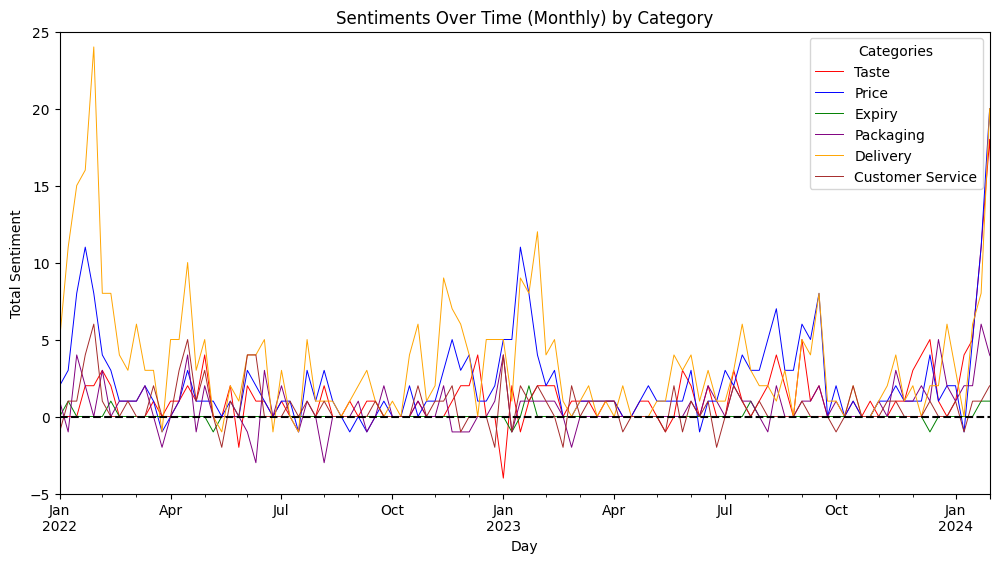

In [60]:
# Definie sentiment values
sentiment_mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}

# Function to extract the sentiment for a given category
def extract_category_sentiment(category_dict, category):
    if isinstance(category_dict, str):
        category_dict = ast.literal_eval(category_dict)
    return sentiment_mapping.get(category_dict.get(category, 'neutral'), 0)

# Apply the function to create a new column 'Product_Quality_Sentiment'
categories = ['Taste', 'Price', 'Expiry', 'Packaging', 'Delivery', 'Customer Service']
for category in categories:
    cocacola_df[f'{category}_sentiment'] = cocacola_df['Categories'].apply(lambda x: extract_category_sentiment(x, category))

# Plot the data
plt.figure(figsize=(12, 6))
colors = {'Taste':'red', 'Price':'blue', 'Expiry':'green', 'Packaging':'purple', 'Delivery':'orange', 'Customer Service':'brown'}
for category in categories:
    sentiments_plot = cocacola_df.groupby(pd.Grouper(key='Converted_Date', freq='W'))[f'{category}_sentiment'].sum()
    sentiments_plot.plot(kind='line', color=colors[category], label=category, alpha=1, linewidth=0.7)

plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Day')
plt.ylabel('Total Sentiment')
plt.legend(title='Categories')
plt.title('Sentiments Over Time (Monthly) by Category')

plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2024-1-31'))
plt.ylim(-5,25)
plt.show()

#### 5e. Highlight specific category

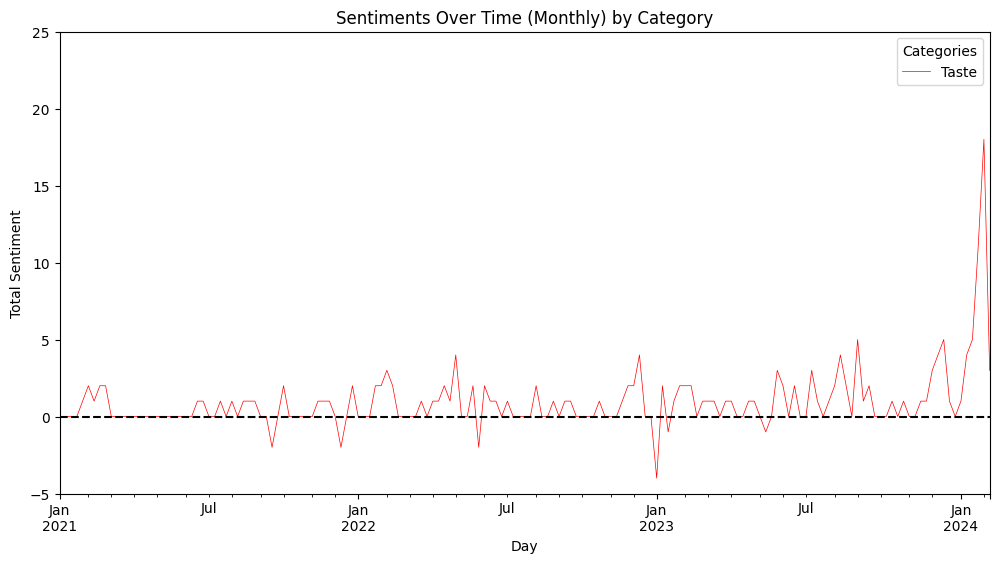

In [55]:
category = "Taste"

plt.figure(figsize=(12, 6))
sentiments_plot = cocacola_df.groupby(pd.Grouper(key='Converted_Date', freq='W'))[f'{category}_sentiment'].sum()
sentiments_plot.plot(kind='line', color=colors[category], label=category, alpha=1, linewidth=0.5)

plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Day')
plt.ylabel('Total Sentiment')
plt.legend(title='Categories')
plt.title('Sentiments Over Time (Monthly) by Category')
plt.ylim(-5,25)
# plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-02-28'))
plt.show()